In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
data_cleaned = pd.read_csv('dataset/cleaned_marketing_campaign.csv')

In [20]:
data_cleaned.head(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accepted
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0


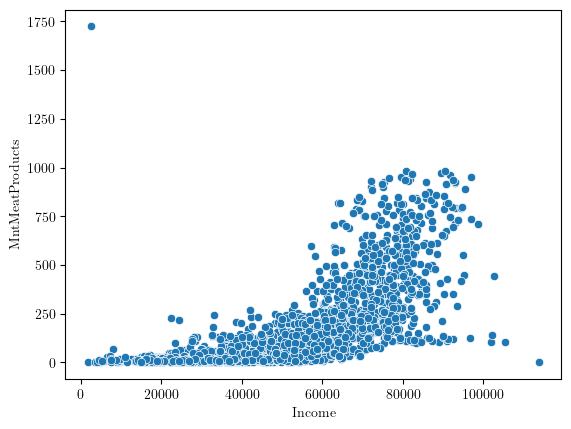

In [21]:
sn.scatterplot(data=data_cleaned, x='Income', y='MntMeatProducts')
plt.show()

In [28]:
outlier_meat = data_cleaned[data_cleaned['MntMeatProducts'] > 1500].index
data_cleaned = data_cleaned.drop(outlier_meat)

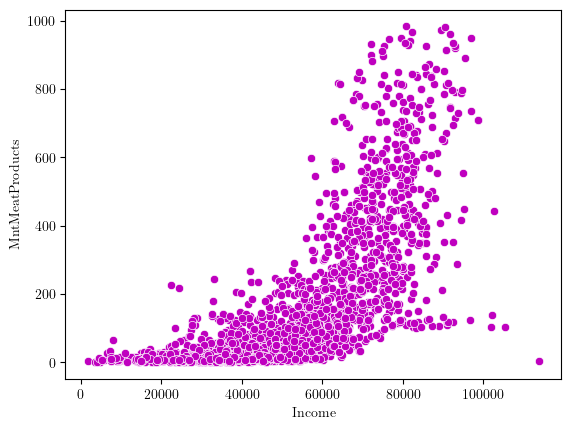

In [30]:
sn.scatterplot(data=data_cleaned, x='Income', y='MntMeatProducts', color='m')
plt.show()

In [34]:
X = data_cleaned['Income'].to_numpy().reshape(-1,1)
y = data_cleaned['MntMeatProducts'].to_numpy()

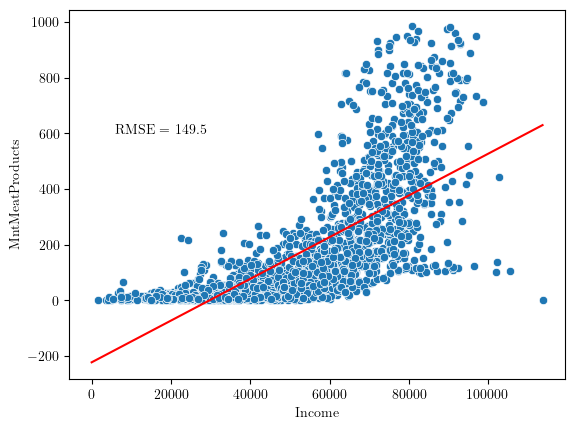

In [67]:
liner_reg = LinearRegression()
liner_reg.fit(X, y)

sn.scatterplot(data=data_cleaned, x='Income', y='MntMeatProducts')

a = liner_reg.coef_[0]
b = liner_reg.intercept_
x_var = np.linspace(0, data_cleaned['Income'].max(), 101)
y_var = a * x_var + b

y_pred = liner_reg.predict(X)
MSE = mean_squared_error(y, y_pred)

plt.text(6000, 600, 'RMSE = %.1f'%np.sqrt(MSE))
sn.lineplot(x=x_var, y=y_var, color='red')
plt.show()

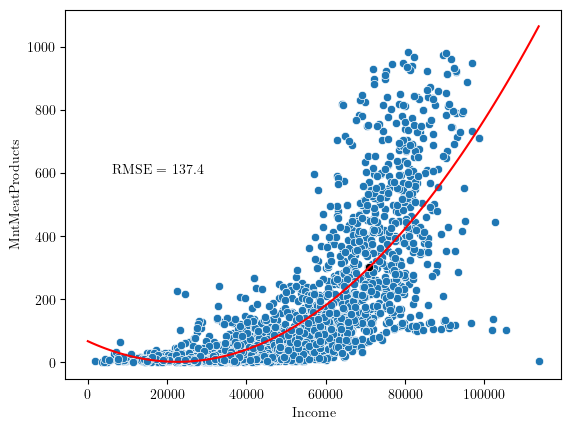

In [72]:
sn.scatterplot(data=data_cleaned, x='Income', y='MntMeatProducts')

X_2 = np.concatenate((X, X**2), axis=1)
X_2 = np.c_[X, X**2]

liner_reg.fit(X_2, y)

a1, a2, b = liner_reg.coef_[0], liner_reg.coef_[1], liner_reg.intercept_
x_var = np.linspace(0, data_cleaned['Income'].max(), 101)
y_var = a1 * x_var + a2 * x_var**2 + b

y_pred = liner_reg.predict(X_2)
MSE = mean_squared_error(y, y_pred)

plt.text(6000, 600, 'RMSE = %.1f'%np.sqrt(MSE))
sn.lineplot(x=x_var, y=y_var, color='red')

sn.scatterplot(x=X[200], y=y_pred[200], markers='*', color='k')

plt.show()